In [2]:
import cv2 #opencv-python-headless             4.5.4.58/ ahora opencv-python                      4.5.5.62
import pytesseract
#import easyocr
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
img = cv2.imread('Hand.png')

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'D:\Program Files\Tesseract-OCR\tesseract.exe'
custom_config = r'--oem 3 --psm 1 -l eng' #AQUÍ -l spa me da el output en inglés
#print(pytesseract.image_to_string(img, config=custom_config))
#https://github.com/tesseract-ocr/tesseract/blob/main/doc/tesseract.1.asc

In [17]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(img):
    return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

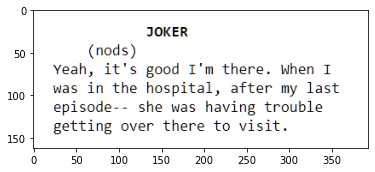

In [11]:
img1 = cv2.imread('script.png')
img2 = remove_noise(img1)
plt.imshow(img1)

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

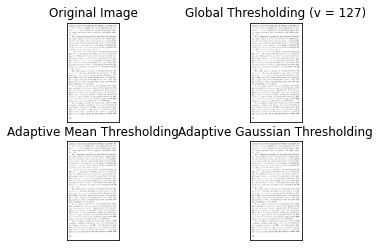

In [11]:
img = cv.imread('049.tif',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

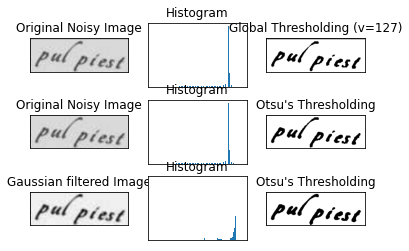

In [13]:
img = cv.imread('r1.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

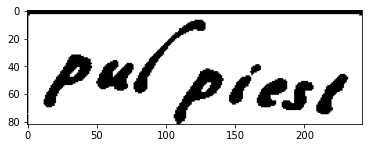

NameError: name 'custom_config' is not defined

In [5]:
plt.imshow(th3, 'gray')
plt.show()
pytesseract.image_to_string(th3, config=custom_config)
#ESTO ES EL MÉTODO DE OTSU! -- THRESHOLDING PRUEBAS

In [30]:
from gtts import gTTS
import vlc
img = cv2.imread('Walden.png')

# The text that you want to convert to audio
texto = pytesseract.image_to_string(img, config=custom_config)
print(texto)
  
# Language in which you want to convert
language = 'en'
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells 
# the module that the converted audio should 
# have a high speed
myobj = gTTS(text=texto, lang=language, slow=False)
  
# Saving the converted audio in a mp3 file named
# welcome 
myobj.save("prueba.mp3")
  
# Playing the converted file

p = vlc.MediaPlayer("prueba.mp3")
p.play()

Wuen I wrote the following pages, or
rather the bulk of them, I lived alone, in
the woods, a mile from any neighbor, in a
house which I had built myself, on the shore
of Walden Pond, in Concord, Massachu-
setts, and earned my living by the labor of
my hands only. I lived there two years and
two months. At present I am a sojourner
in civilized life again.

I should not obtrude my affairs so much
on the notice of my readers if very par-
ticular inquiries had not been made by
my townsmen concerning my mode of life,
which some would call impertinent, though
they do not appear to me at all impertinent,
but, considering the cireumstances, very nat-
ural and pertinent. Some have asked what
I got to eat; if I did not feel lonesome ; if



0

In [2]:
webcam = cv2.VideoCapture(0) # Cuánto tardará en hacer cada foto? -- Cada cuánto hago una foto? -- 
check, frame = webcam.read()
cv2.imwrite(filename=r'saved_img.jpg', img=frame)
webcam.release()

In [63]:
from pytesseract import Output
img = cv2.imread('Walden.png')
d = pytesseract.image_to_data(img, config=custom_config, output_type=Output.DICT)
#datos de pytesseract, pero es un string! -> Array-zarlo?
print(d['text'])


['', '', '', '', 'Wuen', 'I', 'wrote', 'the', 'following', 'pages,', 'or', '', 'rather', 'the', 'bulk', 'of', 'them,', 'I', 'lived', 'alone,', 'in', '', 'the', 'woods,', 'a', 'mile', 'from', 'any', 'neighbor,', 'in', 'a', '', 'house', 'which', 'I', 'had', 'built', 'myself,', 'on', 'the', 'shore', '', 'of', 'Walden', 'Pond,', 'in', 'Concord,', 'Massachu-', '', 'setts,', 'and', 'earned', 'my', 'living', 'by', 'the', 'labor', 'of', '', 'my', 'hands', 'only.', 'I', 'lived', 'there', 'two', 'years', 'and', '', 'two', 'months.', 'At', 'present', 'I', 'am', 'a', 'sojourner', '', 'in', 'civilized', 'life', 'again.', '', '', 'I', 'should', 'not', 'obtrude', 'my', 'affairs', 'so', 'much', '', 'on', 'the', 'notice', 'of', 'my', 'readers', 'if', 'very', 'par-', '', 'ticular', 'inquiries', 'had', 'not', 'been', 'made', 'by', '', 'my', 'townsmen', 'concerning', 'my', 'mode', 'of', 'life,', '', 'which', 'some', 'would', 'call', 'impertinent,', 'though', '', 'they', 'do', 'not', 'appear', 'to', 'me', 

In [62]:
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


#crashea con Jupyter, rodea más cosas de las que debería, pero está bien por ahora

In [16]:
img = cv2.imread('Column.png') #Idiomas, columnas...
text = pytesseract.image_to_string(img, config=custom_config)
print(text)

1. Introduction such as parallel programming, machine learning, cluster design
from the perspective of selecting specific hardware or recycling
The mathematician and computer scientist Alan Turing said it, etc. However, from our understanding, a complementary course
“We can only see a short distance ahead, but we can see plenty introduction to clusters of computers should show all the pos-
there that needs to be done”. High-Performance Computing (on. _Siblities that a supercomputer may provide and let the students
ward, HPC) is nowadays vital for almost every researcher and d&cide which aspect appeals more to them. For this purpose, in
company, covering from data analysis to computer simulations and the course, we opted for covering a wider scope of HPC-related
artificial intelligence studies. By analyzing the short distance ahead _‘fId, providing the attendees with general basics. |

of us, as graduates from Universitat Jaume | (UJl), we observed ‘Three main reasons motivated us to cr

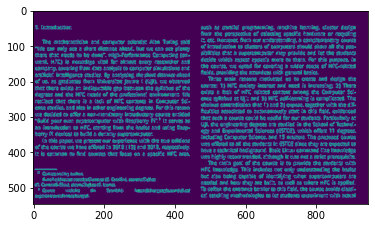

In [18]:
plt.imshow(canny(img))

In [7]:
#detectar todo
filename = 'Walden.png'

# read the image and get the dimensions
img = cv2.imread(filename)
h, w, _ = img.shape # assumes color image

# run tesseract, returning the bounding boxes
boxes = pytesseract.image_to_boxes(img, config=custom_config) # also include any config options you use

# draw the bounding boxes on the image
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

print(boxes)
# show annotated image and wait for keypress
cv2.imshow(filename, img)
cv2.waitKey(0)
cv2.destroyAllWindows()

W 71 537 98 556 0
u 89 537 103 556 0
e 98 538 114 551 0
n 115 537 141 551 0
I 155 538 165 557 0
w 178 538 186 554 0
r 178 538 216 550 0
o 199 538 210 554 0
t 210 538 221 554 0
e 216 538 235 554 0
t 250 538 257 556 0
h 250 538 271 556 0
e 272 538 282 550 0
f 299 539 308 557 0
o 308 538 319 550 0
l 320 538 334 557 0
l 328 532 340 557 0
o 334 538 345 550 0
w 346 538 369 557 0
i 361 532 373 557 0
n 370 538 382 550 0
g 383 532 396 550 0
p 413 532 425 550 0
a 421 532 433 550 0
g 432 532 444 550 0
e 426 532 460 550 0
s 457 532 469 550 0
, 461 534 476 550 0
o 488 538 500 549 0
r 501 537 510 549 0
r 45 508 54 526 0
a 45 508 66 520 0
t 66 508 78 526 0
h 67 508 88 526 0
e 89 508 99 520 0
r 100 508 110 520 0
t 124 508 132 523 0
h 133 508 145 526 0
e 146 508 156 520 0
b 169 508 181 526 0
u 182 508 193 520 0
l 190 508 204 527 0
k 194 508 215 527 0
o 228 509 239 520 0
f 240 509 248 527 0
t 261 509 269 524 0
h 269 509 282 527 0
e 282 509 292 520 0
m 293 509 311 520 0
, 313 505 317 513 0
I 331 509 342 

In [34]:
pytesseract.pytesseract.tesseract_cmd = r'D:\Program Files\Tesseract-OCR\tesseract.exe'
custom_config = r'--oem 3 --psm 1 -l eng'
import pyttsx3 #alternativa gTTS offline
engine = pyttsx3.init()
img = cv2.imread('Walden.png')
texto = pytesseract.image_to_string(img, config=custom_config)
print(texto)
engine.say(texto);
engine.runAndWait()

Wuen I wrote the following pages, or
rather the bulk of them, I lived alone, in
the woods, a mile from any neighbor, in a
house which I had built myself, on the shore
of Walden Pond, in Concord, Massachu-
setts, and earned my living by the labor of
my hands only. I lived there two years and
two months. At present I am a sojourner
in civilized life again.

I should not obtrude my affairs so much
on the notice of my readers if very par-
ticular inquiries had not been made by
my townsmen concerning my mode of life,
which some would call impertinent, though
they do not appear to me at all impertinent,
but, considering the cireumstances, very nat-
ural and pertinent. Some have asked what
I got to eat; if I did not feel lonesome ; if



In [33]:
engine = pyttsx3.init()

for voice in engine.getProperty('voices'):
    print(voice)

voices = engine.getProperty('voices')       #getting details of current voice
engine.setProperty('voice', voices[1].id)   #[1]=Mujer
#carga voces asociadas al ordenador -- se puede configurar:
#sapi5 - SAPI5 on Windows
#nsss - NSSpeechSynthesizer on Mac OS X
#espeak - eSpeak on every other platform -- RPi?

<Voice id=HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
          name=Microsoft David Desktop - English (United States)
          languages=[]
          gender=None
          age=None>
<Voice id=HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
          name=Microsoft Zira Desktop - English (United States)
          languages=[]
          gender=None
          age=None>


In [6]:
img = cv2.imread('Quixote.png')

# The text that you want to convert to audio
texto = pytesseract.image_to_string(img, config=custom_config)
print(texto)

En un lugar de la Mancha de cuyo nombre no quiero acordarme, vivid
hace mucho tiempo un hidalgo caballero que tenia fama de bueno. Se
llamaba Alonso Quijano. Era alto y seco como un palo, tenia unos
cincuenta afios y vivia con una criada que rondaba los cuarenta y una
sobrina que no llegaba a los veinte.

Era un gran madrugador, le apasionaba el mundo de la caza. Como
buen hidalgo, vivia de sus rentas: no le faltaba de nada, aunque presumia
de vivir sin lujos. Apenas tenia deberes ni obligaciones diarias, por lo que
dedicaba sus horas ociosas a leer libros de caballerias con tanta pasién
que, incluso, lleg6 a olvidar la caza y la administracioén de su finca. Su
obsesion por la lectura era tal que tuvo que vender parte de sus tierras
para comprar libros y mas libros de caballerias.



In [14]:
pytesseract.pytesseract.tesseract_cmd = r'D:\Program Files\Tesseract-OCR\tesseract.exe'
custom_config = r'--oem 3 --psm 1 -l eng'

In [21]:
img = cv2.imread("PruebaOrganica.png", 0)
kernel = np.ones((25, 25), np.uint8)
eroded = cv2.erode(img, kernel, iterations=2)
dilated = cv2.dilate(eroded, kernel, iterations=1)
thresholded = cv2.threshold(dilated, 150, 255, cv2.THRESH_BINARY_INV)[1]
countours = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
if len(countours) == 2:
    x, y, w, h = cv2.boundingRect(countours[0])
    crop = img[y:h + y, x:w + x]
    text = pytesseract.image_to_string(crop)
    print(text)

Product : Perpetual 25-3E Calendar
Manufacturer : Op der Millen -27, avenue Guillaume Moreau - 1050 Bruxelles (Belgium)
Designer : Jean Keup

Description: This cilendat- designed and created in an old mill of Luxembourg Province -
is exported throughout the world. This collection - called after its creators : Op der Millen
is one example of highly elaborate Belgian design
Material: Pastified cardboard printed in 5 colors and in five languages per calenda
Dimensions : Diameter 40 em x 3
Packing: Individual cardboard case
Price per item (Including gift wrapping, with the mention “presented by.
‘export duties from Belgium).
Minimum order : $00 units.

For 500: 83 Bel. Fr.

For 1000 and more : 78 Bel. Fr.
Delivery delays: 6 to 8 weeks.

 

 

and

Design Conte. Tel 11 9341. ~ 1000- Bruxelles
Galerie Ravenstein Galeri) $1 ~ 1000 - Brussel



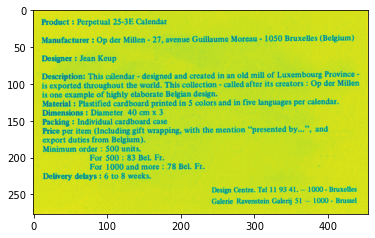

In [23]:
plt.imshow(crop)
plt.show()

In [29]:
print(text)

Product : Perpetual 25-3E Calendar
Manufacturer : Op der Millen -27, avenue Guillaume Moreau - 1050 Bruxelles (Belgium)
Designer : Jean Keup

Description: This cilendat- designed and created in an old mill of Luxembourg Province -
is exported throughout the world. This collection - called after its creators : Op der Millen
is one example of highly elaborate Belgian design
Material: Pastified cardboard printed in 5 colors and in five languages per calenda
Dimensions : Diameter 40 em x 3
Packing: Individual cardboard case
Price per item (Including gift wrapping, with the mention “presented by.
‘export duties from Belgium).
Minimum order : $00 units.

For 500: 83 Bel. Fr.

For 1000 and more : 78 Bel. Fr.
Delivery delays: 6 to 8 weeks.

 

 

and

Design Conte. Tel 11 9341. ~ 1000- Bruxelles
Galerie Ravenstein Galeri) $1 ~ 1000 - Brussel



**MULTIPROCESSING**
Quiero que mi código haga fotos a la vez que comprueba si es la misma página, que segmente y optimice la imagen, que vaya leyéndola... Quizás una buena manera de saber si se ha cambiado de página es buscar en qué número de página está, así también evitamos que se salte una página sin querer.

In [40]:
import multiprocessing
start = time.perf_counter()
process1 = multiprocessing.Process(target=useless_function)
process2 = multiprocessing.Process(target=useless_function)
process1.start()
process2.start()
end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)') #Finished in 0.01 second(s) -> Algo no funciona

Finished in 0.01 second(s)


In [45]:
start = time.perf_counter()
webcam = cv2.VideoCapture(0) # Cuánto tardará en hacer cada foto? -- Cada cuánto hago una foto? -- 
check, frame = webcam.read()
cv2.imwrite(filename=r'saved_img.jpg', img=frame)
webcam.release()
end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)') #ALREDEDOR DE 2 SEGUNDOS EN HACER CADA FOTO

Finished in 2.05 second(s)


In [47]:
i = 0
while i<5:
    i+=1
    webcam = cv2.VideoCapture(0) # Cuánto tardará en hacer cada foto? -- Cada cuánto hago una foto? -- 
    check, frame = webcam.read()
    #puedo comparar el frame aquí y la última imagen que haya guardado!!!
    cv2.imwrite(filename=r'saved_img.jpg', img=frame)
    webcam.release()
    print(i)


1
2
3
4
5
6
7
8
9
10


In [1]:
i = 0
#Aquí dentro es donde voy a meter el código entero
while True:
    i+=1
    time.sleep(1)
    print(i)
    keyboard.wait('esc')

NameError: name 'time' is not defined

In [ ]:
img = cv2.imread('4.png')
img = deskew(img)
cv2.imwrite("ojalafuncione.png", img)
img = thresholding(cv2.imread("ojalafuncione.png",0))
d = pytesseract.image_to_data(img, output_type=Output.DICT)
image_copy = img.copy()
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (124, 198, 92), 2)
cv2.imshow('img', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img1 = cv2.imread("AllContours.png")
img2 = cv2.imread("RightDilate.png")
img3 = cv2.imread("Overdilate.png")
img = np.concatenate((img1, img2, img3), axis=1)
cv2.imwrite("DemostracionContornos.png", img)

In [ ]:
img = cv2.imread('4.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
image_copy = img.copy()
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (124, 198, 92), 4)
cv2.imwrite("SinRotFilt.png", image_copy)